Solving n-queens Problem using Evolutionary Computation






In [4]:

# Adian Cabreros   



In [3]:
pip install deap

  Created wheel for deap: filename=deap-1.3.1-py3-none-any.whl size=102109 sha256=e16cad5d257162ba86ae9111ae34934e6dd78f1177bda8cd6be581770e5146e1
  Stored in directory: c:\users\adrian\appdata\local\pip\cache\wheels\0a\c1\7c\8724cac6aef40f4949ac0355ccc8059bf4feaf2a2ba7cd4b00
Successfully built deap



You should consider upgrading via the 'c:\users\adrian\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.



## Part I: Position-index-based board representation

In [0]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -> Minimum Problem
creator.create("Individual", list, fitness=creator.FitnessMin)


In [0]:
def create_individual():
    return random.sample(range(64), 8)

In [7]:
print(create_individual())

[55, 62, 36, 33, 28, 6, 34, 48]


In [0]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [0]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [10]:
pop = toolbox.population(n=5)

print(pop[0])

[21, 44, 36, 31, 9, 8, 52, 37]


In [11]:
show_grid(pop[0])

-|-|-|-|-|-|-|-|
----------------
X|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|X|X|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------


In [0]:
#fitness function
def evaFitness(individual):
    
    conflict = 0
    

    
    for x in range(len(individual)-1):
      for y in range(x+1, len(individual) -1):
        if(individual[x] != individual[y]):
          if(int(individual[x]/8) == int(individual[y]/8)):
            conflict += 1
          elif(individual[x]%8 == individual[y]%8):
            conflict += 1
          elif(((int(individual[x]/8) - int((individual[y]/8)))/(individual[x]%8 - individual[y]%8)) == -1):
            conflict += 1
          elif(((int(individual[x]/8) - int((individual[y]/8)))/(individual[x]%8 - individual[y]%8)) == 1):
            conflict += 1
    
    
    
    
    return (checkDuplicate(individual) + conflict,)
    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
    dup = 0

    for i in range(len(individual)):
      for j in range(i+1, len(individual)):
        if(individual[i]==individual[j]):
          dup += 1
    
    return dup*10
    
    

### 5 pts:  Evaluate function

In [0]:

toolbox.register("evaluate", evaFitness)





In [0]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [0]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [0]:
stats.register("avg", np.mean)
stats.register("min", np.min)

### create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   Run the algorithm for 100 generations. 

In [18]:

hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.5, ngen=100, stats=stats, halloffame=hof, verbose=True)












gen	nevals	avg	min
0  	0     	2.4	2  
1  	3     	2.8	2  
2  	5     	2.4	2  
3  	5     	2.8	2  
4  	3     	3  	2  
5  	4     	2.8	2  
6  	2     	4  	2  
7  	1     	2  	2  
8  	5     	8  	2  
9  	4     	2.8	2  
10 	5     	3.8	2  
11 	4     	3  	2  
12 	3     	2  	2  
13 	5     	4.4	2  
14 	2     	3  	2  
15 	0     	2  	2  
16 	2     	2  	2  
17 	1     	4  	2  
18 	3     	2  	2  
19 	5     	2  	2  
20 	4     	2  	2  
21 	4     	2.4	2  
22 	3     	4  	2  
23 	3     	3.4	2  
24 	4     	4  	2  
25 	4     	3.8	2  
26 	2     	3  	2  
27 	3     	2.4	2  
28 	3     	1.8	1  
29 	4     	1.4	1  
30 	5     	1.2	1  
31 	3     	1  	1  
32 	3     	1  	1  
33 	2     	1  	1  
34 	4     	2.2	1  
35 	2     	1.4	1  
36 	3     	1.6	1  
37 	3     	1.6	1  
38 	4     	1  	1  
39 	1     	1.2	1  
40 	4     	2  	1  
41 	3     	1  	1  
42 	3     	1.4	1  
43 	2     	4  	1  
44 	4     	1.6	1  
45 	3     	2  	1  
46 	3     	1  	1  
47 	4     	1.8	1  
48 	3     	1.2	1  
49 	3     	1.8	1  
50 	5     	2.2	1  
51 	5     	2

### Plot the "avg" and "min" for each generation

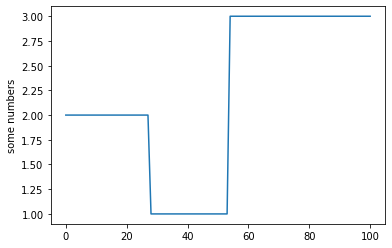

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline  



# print(log)
# log.select('min')
# log.select('avg')
# print(pop)
# print(stats)
plt.plot(log.select('min'))
plt.ylabel('min values')
plt.show()


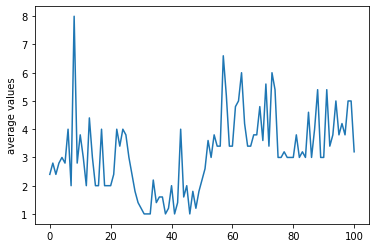

In [36]:
plt.plot(log.select('avg'))
plt.ylabel('average values')
plt.show()

###  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [42]:


print(pop[0])
print("fitness value: ", evaFitness(pop[0]))
show_grid(pop[0])











[49, 30, 34, 16, 0, 15, 45, 54]
fitness value:  (3,)
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|X|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|-|-|
----------------


## Row-index-based board representation

In [43]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [0]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [45]:
toolbox.individual()

[2, 6, 1, 1, 3, 4, 5, 3]

In [0]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")




In [0]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [48]:
pop = toolbox.population(n=5)

print(pop[0])

[1, 1, 4, 2, 6, 6, 1, 5]


In [49]:
show_grid(pop[0])

-|X|-|-|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------


### Return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  



In [0]:
#fitness function
def evaFitness(individual):
    conflict = 0
    for i in range(len(individual)):
      for j in range(i+1, len(individual)):
        if(individual[i] == individual[j]):
            conflict += 1
        elif((((j-i)/(individual[i]-individual[j]))==1 or ((j-i)/(individual[i]-individual[j]))==-1)):
            conflict += 1

    
    
    return (conflict,)



    
 
    

### register "evaluate" function to toolbox

In [0]:


toolbox.register("evaluate", evaFitness)







In [0]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)



In [0]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)



###  create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   Run the algorithm for 100 generations. 

In [54]:





hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.5, ngen=100, stats=stats, halloffame=hof, verbose=True)














gen	nevals	avg	min
0  	5     	7.2	5  
1  	5     	5.6	5  
2  	3     	5.6	5  
3  	4     	5.4	5  
4  	3     	4.8	3  
5  	3     	4  	3  
6  	4     	4  	3  
7  	3     	3.4	3  
8  	3     	3  	3  
9  	3     	3.4	3  
10 	5     	4  	3  
11 	5     	3.2	3  
12 	4     	3  	3  
13 	3     	4.2	3  
14 	5     	3.8	3  
15 	2     	3  	3  
16 	4     	3  	3  
17 	2     	3  	3  
18 	1     	3  	3  
19 	4     	3.2	3  
20 	4     	3.2	3  
21 	4     	3.2	3  
22 	5     	3.6	3  
23 	4     	4.4	3  
24 	5     	4.4	3  
25 	4     	4.4	3  
26 	2     	4  	3  
27 	5     	3.8	3  
28 	4     	3  	3  
29 	4     	3.4	3  
30 	3     	3.2	3  
31 	5     	3  	3  
32 	5     	3.6	3  
33 	2     	3.4	3  
34 	2     	3.4	3  
35 	5     	4.2	3  
36 	4     	3.4	3  
37 	4     	3.8	3  
38 	3     	3.2	3  
39 	4     	4.4	3  
40 	4     	3.6	3  
41 	3     	3.4	3  
42 	4     	3.4	3  
43 	4     	2.8	2  
44 	4     	3.2	3  
45 	3     	3.4	3  
46 	5     	5.8	3  
47 	3     	5.6	3  
48 	3     	4.2	3  
49 	4     	3.2	3  
50 	2     	3.4	3  
51 	2     	3

### 5 pts:  Plot the "avg" and "min" for each generation

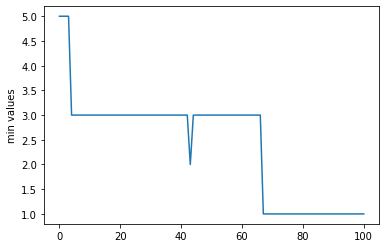

In [55]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  



plt.plot(log.select('min'))
plt.ylabel('min values')
plt.show()






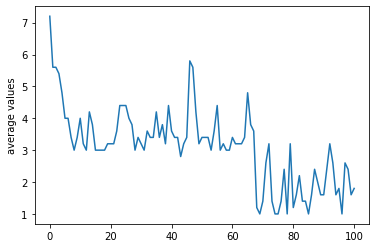

In [56]:
plt.plot(log.select('avg'))
plt.ylabel('average values')
plt.show()

###  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [57]:




print(pop[0])
print("fitness value: ", evaFitness(pop[0]))
show_grid(pop[0])













[5, 3, 6, 0, 3, 1, 7, 2]
fitness value:  (1,)
-|-|-|-|-|X|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|X|-|-|-|-|-|
----------------
